# Scatterplots of active region statistics

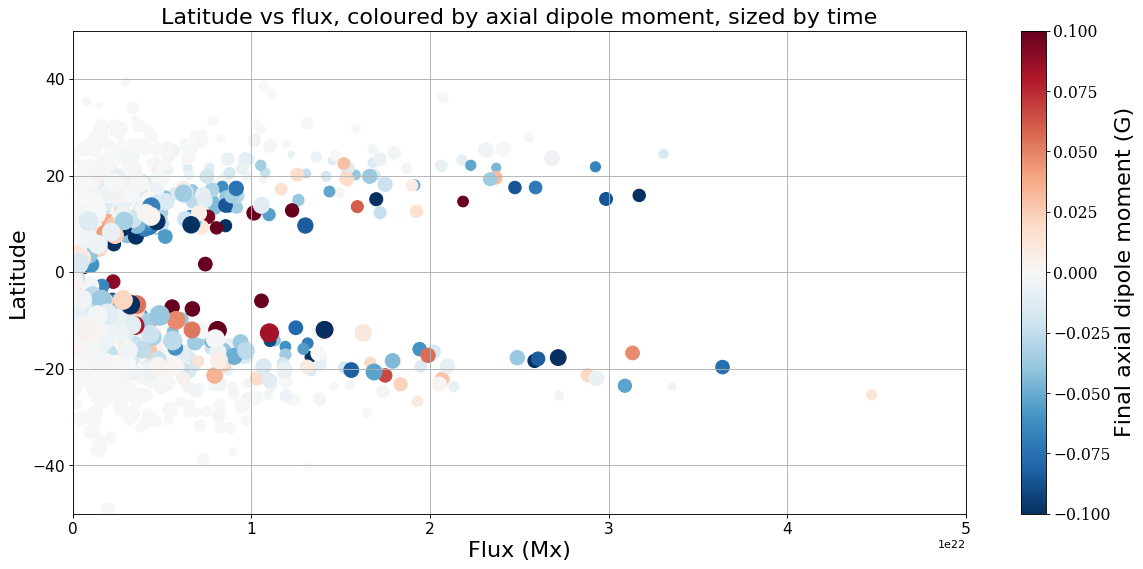

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcol
import matplotlib.cm as cm
import itertools


A = np.fromfile('axcollect_correct.dat',dtype=np.float32)
A = A.reshape(951,164)

N = np.fromfile('npole_correct.dat',dtype=np.float32)
N = N.reshape(951,164)

S = np.fromfile('spole_correct.dat',dtype=np.float32)
S = S.reshape(951,164)

start = []
start_npole = []
start_spole = []
begin = []
begin_npole = []
begin_spole = []

for i in range(951):
    index = np.nonzero(A[i,:])
    start.append(index[0][0])
    begin.append(A[i,start[i]])
    index_npole = np.nonzero(A[i,:]);
    start_npole.append(index_npole[0][0]);
    begin_npole.append(N[i,start_npole[i]]);
    index_spole = np.nonzero(S[i,:]);
    start_spole.append(index_spole[0][0]);
    begin_spole.append(S[i,start_spole[i]]);
    
start = np.asarray(start)
start_npole = np.asarray(start_npole)
start_spole = np.asarray(start_spole)
begin = np.asarray(begin)
begin_npole = np.asarray(begin_npole)
begin_spole = np.asarray(begin_spole)

final = A[:,163]
final_npole = N[:,163]
final_spole = S[:,163]

thresh = 2.4e-2;
strong = np.asarray(np.where(abs(final)>thresh))
weak = np.asarray(np.where(abs(final)<thresh))
reg_percent = strong.size/951*100;
#print(reg_percent)

thresh_npole = 2.4e-2;
strong_npole = np.asarray(np.where(abs(final_npole)>thresh_npole))
weak_npole = np.asarray(np.where(abs(final_npole)<thresh_npole))
reg_percent_npole = strong_npole.size/951*100;
#print(reg_percent_npole)

thresh_spole = 2.4e-2;
strong_spole = np.asarray(np.where(abs(final_spole)>thresh_spole))
weak_spole = np.asarray(np.where(abs(final_spole)<thresh_spole))
reg_percent_spole = strong_spole.size/951*100;
#print(reg_percent_spole)

initflux = np.fromfile('initflux_collect.dat',dtype=np.float32)
initflux2 = np.fromfile('initflux2_collect.dat',dtype=np.float32)
reg_lat = np.fromfile('reg_lat_collect.dat',dtype=np.float32)


fig1 = plt.figure(figsize=(18,8), dpi= 80, facecolor='w', edgecolor='k')
plt.scatter(abs(initflux2),reg_lat,2*start,final,cmap='RdBu_r',vmin=-0.1,vmax=0.1)
cb_label = 'Final axial dipole moment (G)'
cb = plt.colorbar()
cb.set_label(cb_label, fontsize=20)
cbytick_obj = plt.getp(cb.ax.axes, 'yticklabels')
plt.setp(cbytick_obj, fontsize=14, family='serif')
plt.ylim(-50,50)
plt.xlim(0,5e22)
plot = fig1.add_subplot(111)
plot.tick_params(axis='both', which='major', labelsize=14)
plot.tick_params(axis='both', which='minor', labelsize=10)
plt.ylabel('Latitude',fontsize=20)
plt.xlabel('Flux (Mx)',fontsize=20)
plt.title('Latitude vs flux, coloured by axial dipole moment, sized by time',fontsize=20)
plt.grid()
plt.show()


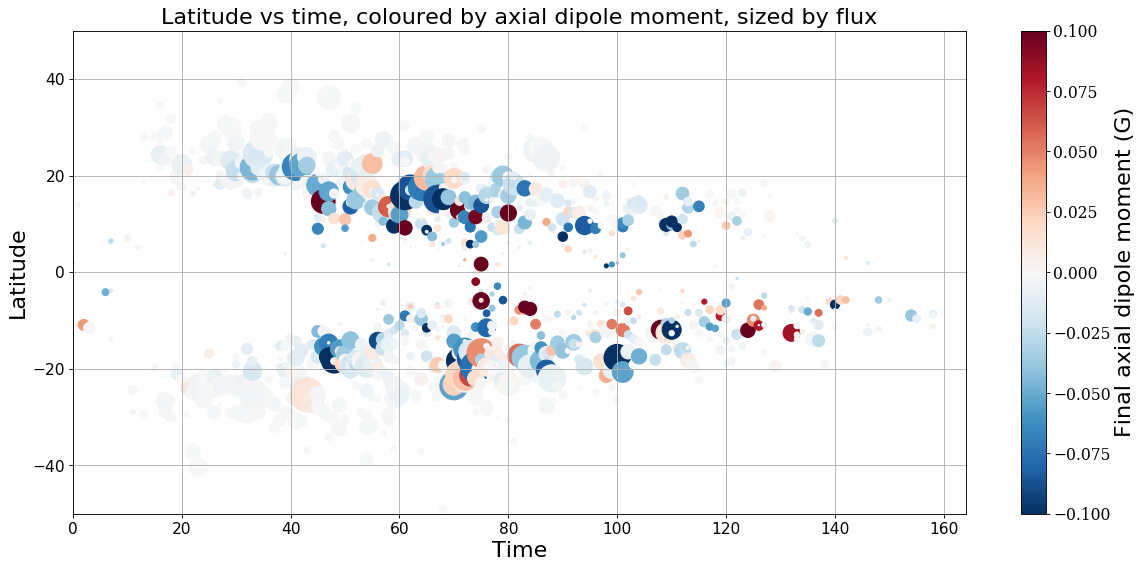

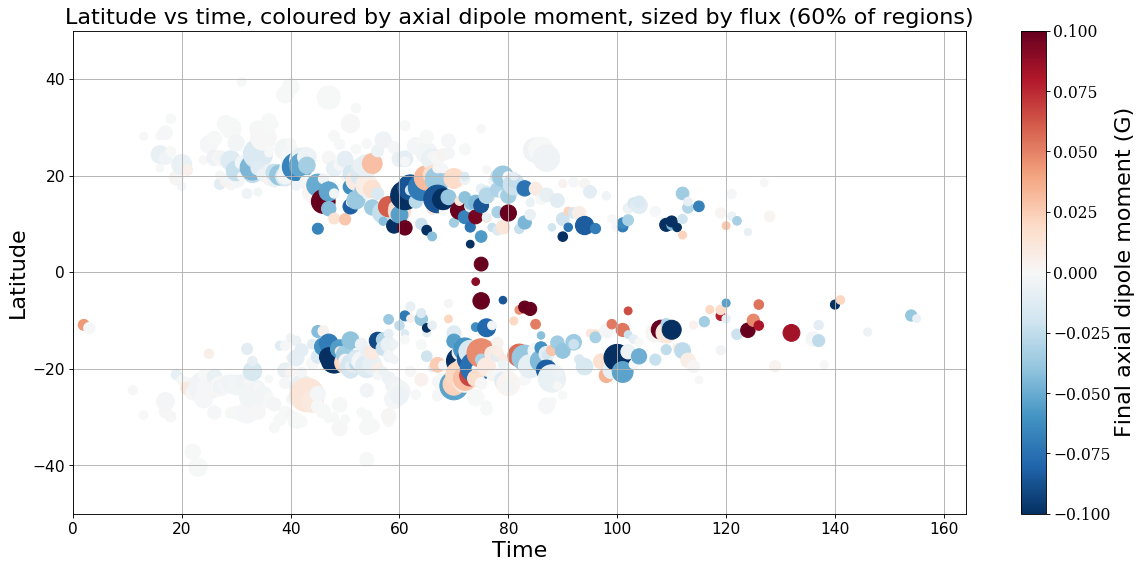

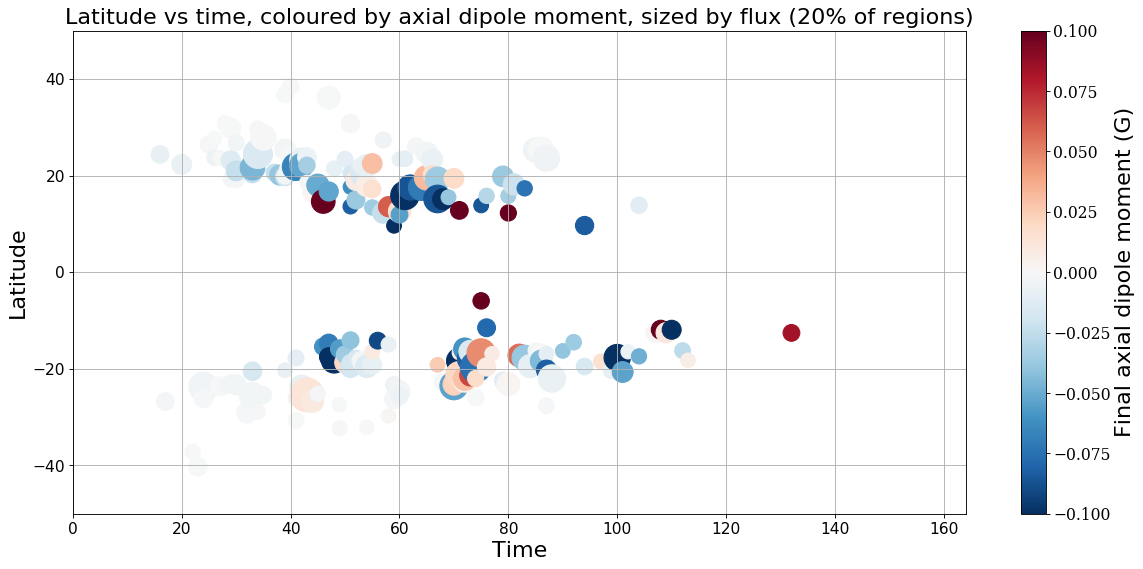

In [3]:
fig2 = plt.figure(figsize=(18,8), dpi= 80, facecolor='w', edgecolor='k')
plt.scatter(start,reg_lat,100*abs(initflux),final,cmap='RdBu_r',vmin=-0.1,vmax=0.1)
cb_label = 'Final axial dipole moment (G)'
cb = plt.colorbar()
cb.set_label(cb_label, fontsize=20)
cbytick_obj = plt.getp(cb.ax.axes, 'yticklabels')
plt.setp(cbytick_obj, fontsize=14, family='serif')
plt.ylim(-50,50)
plt.xlim(0,164)
plot = fig2.add_subplot(111)
plot.tick_params(axis='both', which='major', labelsize=14)
plot.tick_params(axis='both', which='minor', labelsize=10)
plt.ylabel('Latitude',fontsize=20)
plt.xlabel('Time',fontsize=20)
plt.title('Latitude vs time, coloured by axial dipole moment, sized by flux',fontsize=20)
plt.grid()
plt.show()


        
thresh_flux = 2.12e21;
strong_flux = np.asarray(np.where(abs(initflux2)>thresh_flux))
weak_flux = np.asarray(np.where(abs(initflux2)<thresh_flux))
reg_percent_flux = strong_flux.size/951*100;
#print(reg_percent_flux)

fig = plt.figure(figsize=(18,8), dpi= 80, facecolor='w', edgecolor='k')
plt.scatter(start[strong_flux],reg_lat[strong_flux],100*abs(initflux[strong_flux]),final[strong_flux],cmap='RdBu_r',vmin=-0.1,vmax=0.1)
cb_label = 'Final axial dipole moment (G)'
cb = plt.colorbar()
cb.set_label(cb_label, fontsize=20)
cbytick_obj = plt.getp(cb.ax.axes, 'yticklabels')
plt.setp(cbytick_obj, fontsize=14, family='serif')
plt.ylim(-50,50)
plt.xlim(0,164)
plot = fig.add_subplot(111)
plot.tick_params(axis='both', which='major', labelsize=14)
plot.tick_params(axis='both', which='minor', labelsize=10)
plt.ylabel('Latitude',fontsize=20)
plt.xlabel('Time',fontsize=20)
plt.title('Latitude vs time, coloured by axial dipole moment, sized by flux (60% of regions)',fontsize=20)
plt.grid()
plt.show()



thresh_flux = 8.12e21;
strong_flux = np.asarray(np.where(abs(initflux2)>thresh_flux))
weak_flux = np.asarray(np.where(abs(initflux2)<thresh_flux))
reg_percent_flux = strong_flux.size/951*100;
#print(reg_percent_flux)

fig6 = plt.figure(figsize=(18,8), dpi= 80, facecolor='w', edgecolor='k')
plt.scatter(start[strong_flux],reg_lat[strong_flux],100*abs(initflux[strong_flux]),final[strong_flux],cmap='RdBu_r',vmin=-0.1,vmax=0.1)
cb_label = 'Final axial dipole moment (G)'
cb = plt.colorbar()
cb.set_label(cb_label, fontsize=20)
cbytick_obj = plt.getp(cb.ax.axes, 'yticklabels')
plt.setp(cbytick_obj, fontsize=14, family='serif')
plt.ylim(-50,50)
plt.xlim(0,164)
plot = fig6.add_subplot(111)
plot.tick_params(axis='both', which='major', labelsize=14)
plot.tick_params(axis='both', which='minor', labelsize=10)
plt.ylabel('Latitude',fontsize=20)
plt.xlabel('Time',fontsize=20)
plt.title('Latitude vs time, coloured by axial dipole moment, sized by flux (20% of regions)',fontsize=20)
plt.grid()
plt.show()

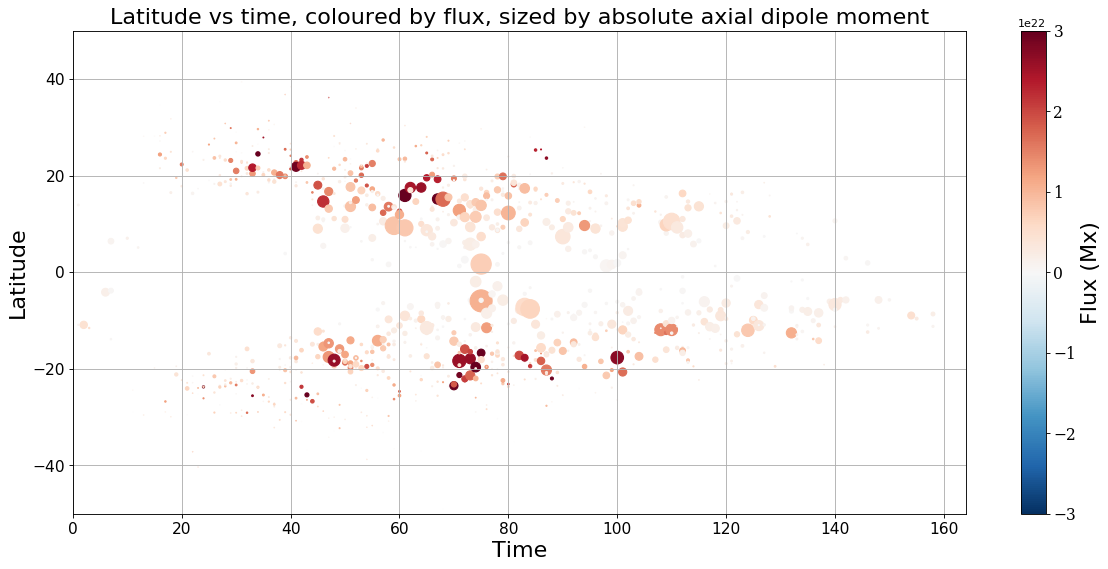

In [4]:
fig3 = plt.figure(figsize=(18,8), dpi= 80, facecolor='w', edgecolor='k')
plt.scatter(start[1:950],reg_lat[1:950],1000*abs(final[1:950]),abs(initflux2[1:950]),cmap='RdBu_r',vmin=-3e22,vmax=3e22)
cb_label = 'Flux (Mx)'
cb = plt.colorbar()
cb.set_label(cb_label, fontsize=20)
cbytick_obj = plt.getp(cb.ax.axes, 'yticklabels')
plt.setp(cbytick_obj, fontsize=14, family='serif')
plt.ylim(-50,50)
plt.xlim(0,164)
plot = fig3.add_subplot(111)
plot.tick_params(axis='both', which='major', labelsize=14)
plot.tick_params(axis='both', which='minor', labelsize=10)
plt.ylabel('Latitude',fontsize=20)
plt.xlabel('Time',fontsize=20)
plt.title('Latitude vs time, coloured by flux, sized by absolute axial dipole moment',fontsize=20)
plt.grid()
plt.show()

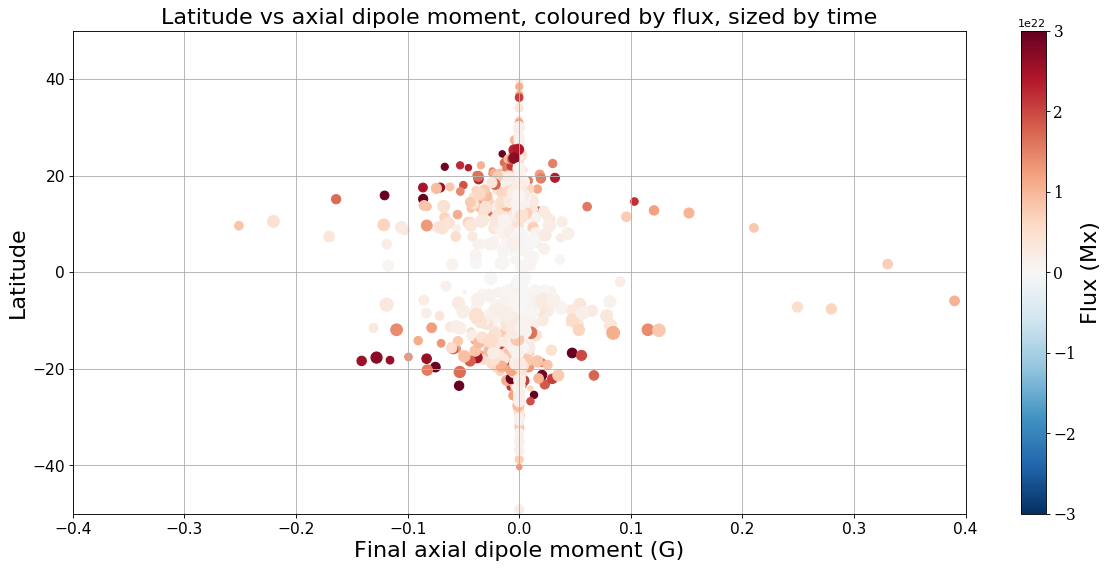

In [5]:
fig3 = plt.figure(figsize=(18,8), dpi= 80, facecolor='w', edgecolor='k')
plt.scatter(final[1:950],reg_lat[1:950],start[1:950],abs(initflux2[1:950]),cmap='RdBu_r',vmin=-3e22,vmax=3e22)
cb_label = 'Flux (Mx)'
cb = plt.colorbar()
cb.set_label(cb_label, fontsize=20)
cbytick_obj = plt.getp(cb.ax.axes, 'yticklabels')
plt.setp(cbytick_obj, fontsize=14, family='serif')
plt.ylim(-50,50)
plt.xlim(-0.4,0.4)
plot = fig3.add_subplot(111)
plot.tick_params(axis='both', which='major', labelsize=14)
plot.tick_params(axis='both', which='minor', labelsize=10)
plt.ylabel('Latitude',fontsize=20)
plt.xlabel('Final axial dipole moment (G)',fontsize=20)
plt.title('Latitude vs axial dipole moment, coloured by flux, sized by time',fontsize=20)
plt.grid()
plt.show()

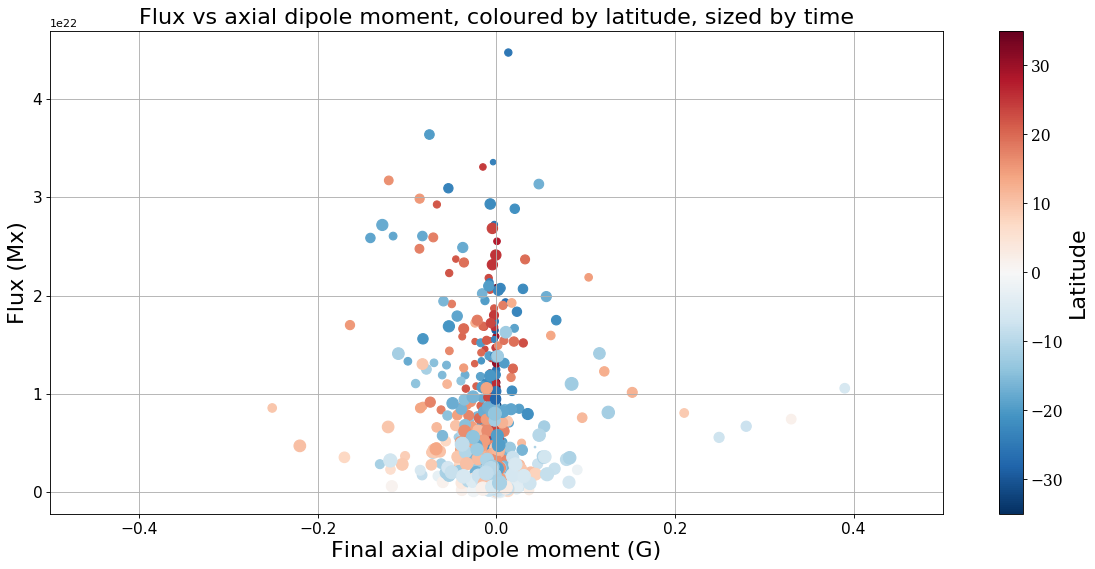

In [6]:
fig3 = plt.figure(figsize=(18,8), dpi= 80, facecolor='w', edgecolor='k')
plt.scatter(final[1:950],abs(initflux2[1:950]),start[1:950],reg_lat[1:950],cmap='RdBu_r',vmin=-35,vmax=35)
cb_label = 'Latitude'
cb = plt.colorbar()
cb.set_label(cb_label, fontsize=20)
cbytick_obj = plt.getp(cb.ax.axes, 'yticklabels')
plt.setp(cbytick_obj, fontsize=14, family='serif')
#plt.ylim(0,5e22)
plt.xlim(-0.5,0.5)
plot = fig3.add_subplot(111)
plot.tick_params(axis='both', which='major', labelsize=14)
plot.tick_params(axis='both', which='minor', labelsize=10)
plt.ylabel('Flux (Mx)',fontsize=20)
plt.xlabel('Final axial dipole moment (G)',fontsize=20)
plt.title('Flux vs axial dipole moment, coloured by latitude, sized by time',fontsize=20)
plt.grid()
plt.show()